# Milestone 1

# Introduction

Nama  : Maulana Azmi Izzuddin

Batch : FTDS-013

## Dataset Information

link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Berisikan data customer dari suatu perusahaan telekomunikasi. Diaman pada kasus ini akan melakukan training model dengan menggunakan Deep Learning untuk memprediksi apakah Customer akan Churn atau tidak Churn.

Dataset berisikan data informasi customer dalam penggunaan pelayanan jasa yang ditawarkan oleh perusahaan telekomunikasi.

## Objective

- Melakukan Exploratory Data Analysis pada dataset
- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.
- Deploy model melalui heroku dengan menggunakan tfserving sebagai backend.

# Import Library

Import libraries yang dibutuhkan :

In [121]:
import numpy as np #untuk operasi array
import pandas as pd #mannipulasi dataframe
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
from sklearn import preprocessing #preprocessing data 
from sklearn import model_selection #digunakan untuk split train-test set
from sklearn import metrics #Untuk metrics evaluasi model
from feature_engine import outliers #untuk deteksi Outliers
from sklearn.compose import ColumnTransformer #digunakan untuk membuat columntransformer
from sklearn.pipeline import Pipeline #digunakan untuk membuat pipeline
from sklearn.ensemble import ExtraTreesClassifier #untuk melihat feature importance
from sklearn.feature_selection import SelectKBest, chi2 # features selection dengan chi score
import tensorflow as tf
from tensorflow import keras
import warnings #untuk ignore warning agar notebook rapih
import pickle

In [122]:
warnings.filterwarnings('ignore') # untuk ignore warning

# Loading Data

In [123]:
# Load data :
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [124]:
# Melihat head data 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [125]:
# Melihat tail data
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Terdapat data customer ID yang tidak diperlukan dan mempengaruhi pada pembuatan model. Sehingga pada data preprocessing data ini akan di drop.

In [126]:
# Melihat shape data
df.shape

(7043, 21)

In [127]:
# Cek duplikasi data
df.duplicated().sum()

0

Tidak ada data terdupliaksi

In [128]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada missing values.

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terlihat pada data total charges seharusnya berbentuk numerical bukan sebuah object. Sehingga disini perlu dilakukan perubahan tipe data pada column Total charges.

Selain itu pada data Senior Citizen ini adalah data yang berupa Yes No sudah dalam bentuk nuemrical.

In [130]:
# convert datatype column TotalCharges
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce')

Menggunakan errors coerce agar jika ada data yang tidak sesusai seperti data kosong dalam bentuk string akan dianggap NaN.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terlihat pada data Total Charges sudah berubah menjadi data numerical.

In [132]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Setelah dilakukan pengubahan tipe data, ternyata terdapat 11 data missing pada Total Charges. Sehingga data ini akan diproses pada section data preprocessing.

In [249]:
#statistic summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis (EDA)

## Explore Data

In [134]:
# melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Pada data set ini terdapat 3 column yang bertipe numerical, yaitu tenure, Monthly Charges, dan TotalCharges.
- 17 column bertipe categorical.
- Data ini terdiri dari 7043 entries denga jumlah features 19 dan 1 data target yaitu churn.

In [135]:
# Melihat unique values dan jumlahnya pada tiap column dengan menggunakan for-loop
for col in df:
    unique_values = np.unique(df[col]) #melihat unique values apa saja
    number_values = len(unique_values) #melihat jumlah unique values
    if number_values <= 6: # jika data type object maka print hingga detail apa saja unique values
        print("Jumlah unique values pada {} : {} yaitu {}".format(col,number_values,unique_values))
    else:
        print("Jumlah unique values pada {} : {}".format(col,number_values))

Jumlah unique values pada customerID : 7043
Jumlah unique values pada gender : 2 yaitu ['Female' 'Male']
Jumlah unique values pada SeniorCitizen : 2 yaitu [0 1]
Jumlah unique values pada Partner : 2 yaitu ['No' 'Yes']
Jumlah unique values pada Dependents : 2 yaitu ['No' 'Yes']
Jumlah unique values pada tenure : 73
Jumlah unique values pada PhoneService : 2 yaitu ['No' 'Yes']
Jumlah unique values pada MultipleLines : 3 yaitu ['No' 'No phone service' 'Yes']
Jumlah unique values pada InternetService : 3 yaitu ['DSL' 'Fiber optic' 'No']
Jumlah unique values pada OnlineSecurity : 3 yaitu ['No' 'No internet service' 'Yes']
Jumlah unique values pada OnlineBackup : 3 yaitu ['No' 'No internet service' 'Yes']
Jumlah unique values pada DeviceProtection : 3 yaitu ['No' 'No internet service' 'Yes']
Jumlah unique values pada TechSupport : 3 yaitu ['No' 'No internet service' 'Yes']
Jumlah unique values pada StreamingTV : 3 yaitu ['No' 'No internet service' 'Yes']
Jumlah unique values pada StreamingMo

- CustomerID akan didrop pada data preprocessing karena data ini adalah unique id pada setiap customer yang tidak akan mempengaruhi data target.
- Terdapat 3 column bertipe numerical, yaitu tenure, monthlycharges, dan totalcharges.
- Terdapat 16 column bertipe categorical, yaitu 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'
- Column Churn adalah data target dengan label Yes atau No.

In [136]:
# Menyimpan nama column pada tipa data type

#numerical
col_num = ['tenure','MonthlyCharges','TotalCharges']
#categorical
col_cat=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

## Visualization Data

# Data Target Balance

Text(0.5, 0, 'Churn')

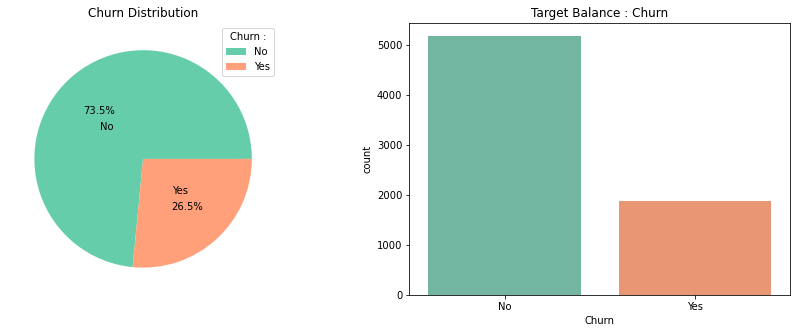

In [137]:
#Plotting data target
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(x = df['Churn'].value_counts(),autopct='%1.1f%%', labels= ['No','Yes'],labeldistance= 0.4, colors = ['mediumaquamarine','lightsalmon'])
plt.title("Churn Distribution")
plt.legend(title = 'Churn :', loc ='best')


plt.subplot(1,2,2)
sns.countplot(x='Churn',data=df, palette='Set2')
plt.title('Target Balance : Churn')
plt.xlabel('Churn')

- Data target terdapat pada column Churn dengan dua label yaitu Yes atau No. 
- Pada datta target ini cukup imbalance, dimana data didominasi oelh customer dengan Churn 'No' sebanyak 73.5% sedangkan yang 'Yes' hanya sebesar 26.5%.
- Data target imbalance.

### Gender

Text(0.5, 1.0, 'Gender Distribution Based on Churn')

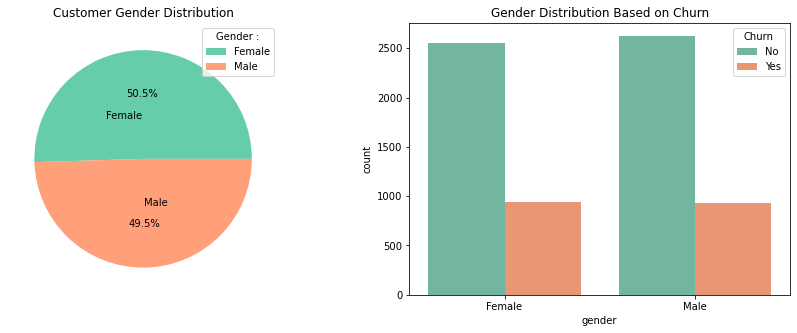

In [138]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(x = df['gender'].value_counts(),autopct='%1.1f%%', labels= ['Female','Male'],labeldistance= 0.4, colors = ['mediumaquamarine','lightsalmon'])
plt.title("Customer Gender Distribution")
plt.legend(title = 'Gender :')

plt.subplot(1,2,2)
sns.countplot(x = 'gender', data = df,hue='Churn',palette='Set2')
plt.title('Gender Distribution Based on Churn')

- Gender terdistribusi merata antar Female dan Male.
- Tidak ada pengaruh yang tinggi terhadap perbedaan gender terhadap Churn.

### Senior Citizen

Text(0.5, 1.0, 'Senior Citizen Distribution Based on Churn')

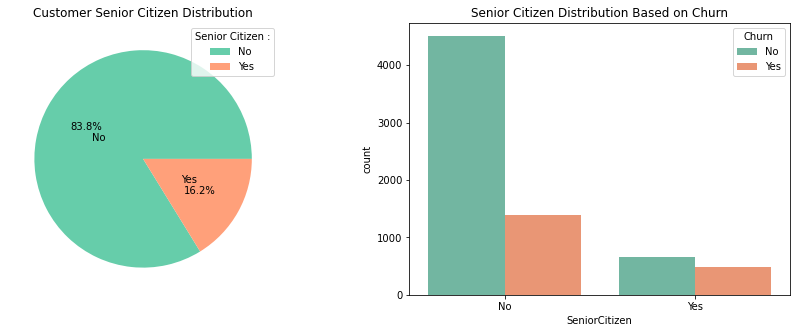

In [139]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(x = df['SeniorCitizen'].value_counts(),autopct='%1.1f%%', labels= ['No','Yes'],labeldistance= 0.4, colors = ['mediumaquamarine','lightsalmon'])
plt.title("Customer Senior Citizen Distribution")
plt.legend(title = 'Senior Citizen :')

plt.subplot(1,2,2)
sns.countplot(x = 'SeniorCitizen', data = df,hue='Churn',palette='Set2')
plt.xticks([0,1],['No','Yes'])
plt.title('Senior Citizen Distribution Based on Churn')

- Berdasarkan Senior Citizen dimana mayoritas Customer bukanlah seorang Senior Citizen. 
- Selain itu dapat dilihat bahwa rasio antar customer Churn dan tidak Churn lebih berdekatan untuk Customer yang merupakan senior Citizen.

### Partner

Text(0.5, 1.0, 'Citizen who have Partner Distribution Based on Churn')

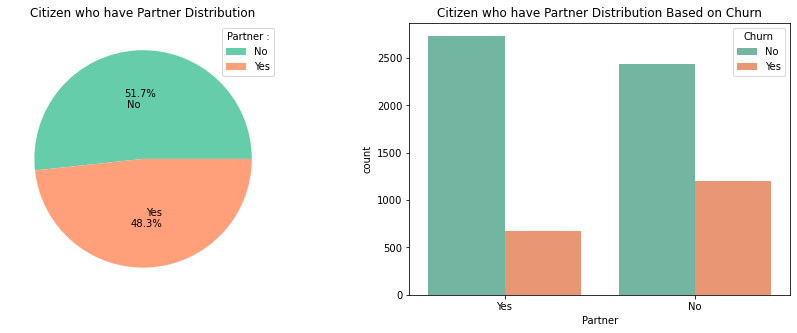

In [140]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(x = df['Partner'].value_counts(),autopct='%1.1f%%',labels= ['No','Yes'], labeldistance= 0.5, colors = ['mediumaquamarine','lightsalmon'])
plt.title("Citizen who have Partner Distribution")
plt.legend(title = 'Partner :')

plt.subplot(1,2,2)
sns.countplot(x = 'Partner', data = df,hue='Churn',palette='Set2')
plt.title('Citizen who have Partner Distribution Based on Churn')

- Berdasarkan partnernya, Customer yang memiliki dan tidak memiliki partner tersebar secara seimbang.
- Berdasarkan Churn, Customer yang tidak memiliki partner lebih mengindikasikan akan Churn.

### Dependents

Text(0.5, 1.0, 'Citizen who have Dependents Distribution Based on Churn')

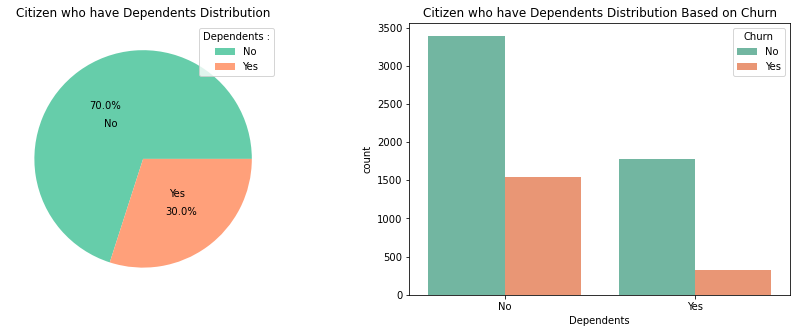

In [141]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(x = df['Dependents'].value_counts(),autopct='%1.1f%%',labels= ['No','Yes'], labeldistance= 0.4, colors = ['mediumaquamarine','lightsalmon'])
plt.title("Citizen who have Dependents Distribution")
plt.legend(title = 'Dependents :')

plt.subplot(1,2,2)
sns.countplot(x = 'Dependents', data = df,hue='Churn',palette='Set2')
plt.title('Citizen who have Dependents Distribution Based on Churn')

- Mayoritas Customer tidak memiliki dependents atau tanggungan.
- Customer yang tidak memiliki dependents lebih mengindikasikan akan Churn.

# Tenure

Text(0.5, 1.0, 'Customer Tenure Distribution Based on Churn')

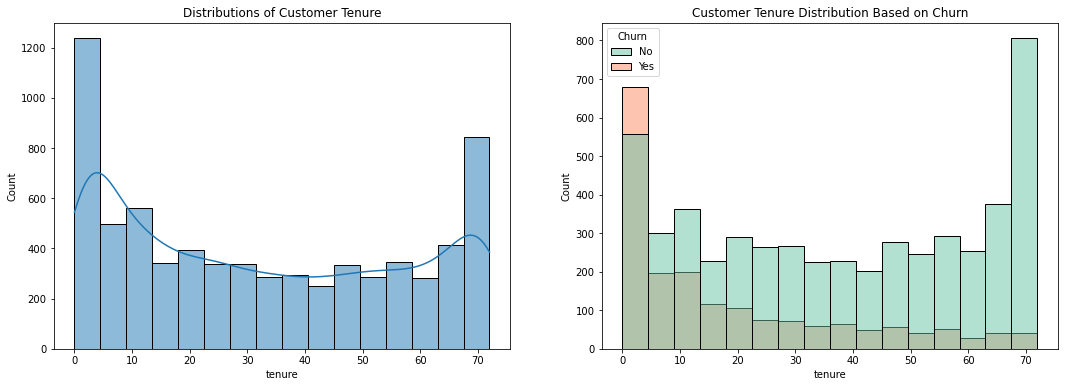

In [142]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(x='tenure',data=df,kde=True,palette='Set2')
plt.title("Distributions of Customer Tenure")

plt.subplot(1,2,2)
sns.histplot(x='tenure',data=df,hue='Churn',palette='Set2')
plt.title('Customer Tenure Distribution Based on Churn')

- Tenure setiap customer terdistribusi dari 0 hingga 70. Dimana mayoritas berada di interval 0-5 dan 65-70.
- Customer dengan Tenure yang rendah lebih mengindikasikan akan Churn dibandingkan Tenure yang tinggi.

### Phone Service

Text(0.5, 1.0, 'Customer who use Phone Service Distribution')

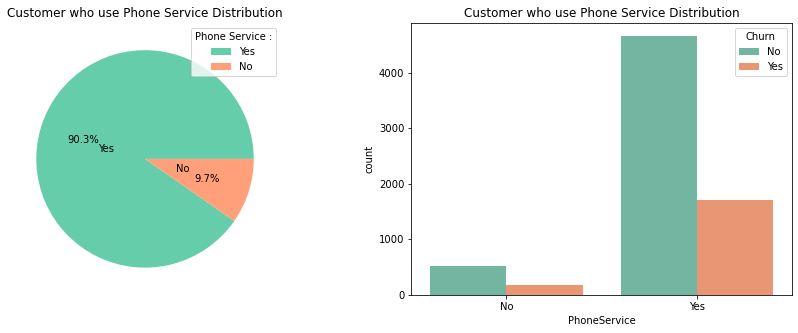

In [143]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(x = df['PhoneService'].value_counts(),autopct='%1.1f%%',labels= ['Yes','No'], labeldistance= 0.3, colors = ['mediumaquamarine','lightsalmon'])
plt.title("Customer who use Phone Service Distribution")
plt.legend(title = 'Phone Service :')

plt.subplot(1,2,2)
sns.countplot(x = 'PhoneService', data = df,hue='Churn',palette='Set2')
plt.title('Customer who use Phone Service Distribution')

- Mayoritas customer menggunakan jasa phone service dari perusahaan telekomunikasi.
- Tidak ada hubungan yang kuat antara penggunaan jasa telepon dengan Churn.

### Multiple Lines

Text(0.5, 1.0, 'Customer who use Multiple Lines Service Distribution')

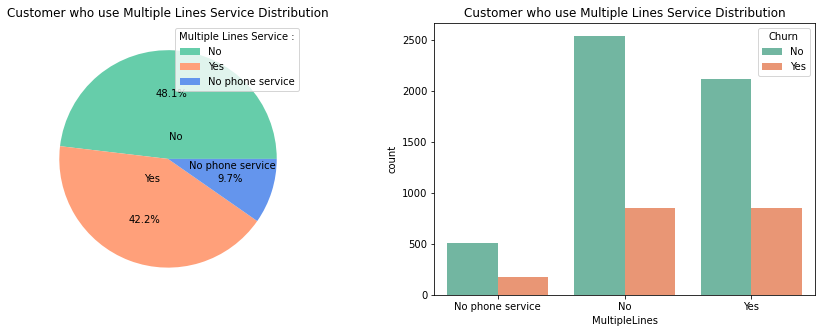

In [144]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(x = df['MultipleLines'].value_counts(),autopct='%1.1f%%',labels= ['No','Yes','No phone service'], labeldistance= 0.2, colors = ['mediumaquamarine','lightsalmon','cornflowerblue'])
plt.title("Customer who use Multiple Lines Service Distribution")
plt.legend(title = 'Multiple Lines Service :')

plt.subplot(1,2,2)
sns.countplot(x = 'MultipleLines', data = df,hue='Churn',palette='Set2')
plt.title('Customer who use Multiple Lines Service Distribution')

- Mayoritas customer menggunakan jasa multiple line service dari perusahaan telekomunikasi.
- Tidak ada hubungan yang kuat antara penggunaan jasa multiple line dengan Churn.

In [145]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

### Internet Service

Text(0.5, 1.0, 'Customer who use Internet Service Distribution')

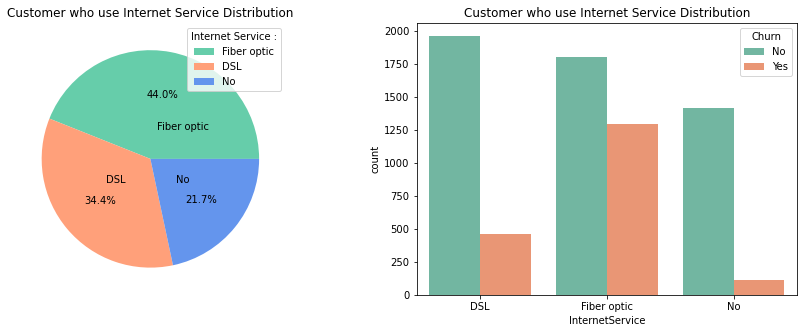

In [146]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(x = df['InternetService'].value_counts(),autopct='%1.1f%%',labels= ['Fiber optic','DSL','No'], labeldistance= 0.3, colors = ['mediumaquamarine','lightsalmon','cornflowerblue'])
plt.title("Customer who use Internet Service Distribution")
plt.legend(title = 'Internet Service :')

plt.subplot(1,2,2)
sns.countplot(x = 'InternetService', data = df,hue='Churn',palette='Set2')
plt.title('Customer who use Internet Service Distribution')

- Mayoritas customer menggunakan jasa Internet Service tipe Fiber Optic dari perusahaan telekomunikasi.
- Consumer yang menggunakan jasa Fiber Optic untuk Internet Servicenya akan kemungkinan akan lebih mengindikasikan Churn..

### Online Security

Text(0.5, 1.0, 'Customer who use Online Security Service Distribution')

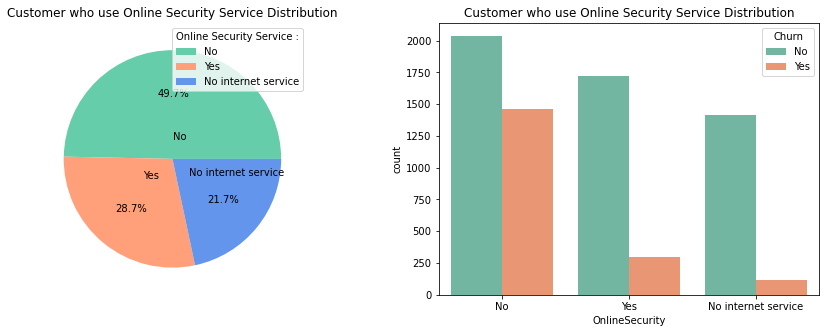

In [147]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(x = df['OnlineSecurity'].value_counts(),autopct='%1.1f%%',labels= ['No', 'Yes','No internet service'], labeldistance= 0.2, colors = ['mediumaquamarine','lightsalmon','cornflowerblue'])
plt.title("Customer who use Online Security Service Distribution")
plt.legend(title = 'Online Security Service :')

plt.subplot(1,2,2)
sns.countplot(x = 'OnlineSecurity', data = df,hue='Churn',palette='Set2')
plt.title('Customer who use Online Security Service Distribution')

- Mayoritas customer tidak menggunakan jasa Online Security dari perusahaan telekomunikasi.
- Consumer yang tidak menggunakan jasa Online Security akan kemungkinan akan lebih mengindikasikan Churn..

### Monthly Charges

Text(0.5, 1.0, 'Customer Monthly Charges Distribution Based on Churn')

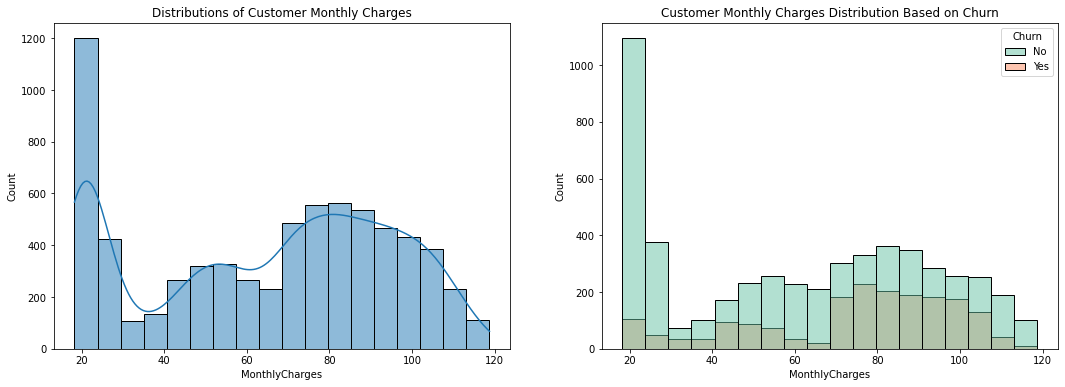

In [148]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(x='MonthlyCharges',data=df,kde=True,palette='Set2')
plt.title("Distributions of Customer Monthly Charges")

plt.subplot(1,2,2)
sns.histplot(x='MonthlyCharges',data=df,hue='Churn',palette='Set2')
plt.title('Customer Monthly Charges Distribution Based on Churn')

- Setiap bulannya Customer akan mendapat tagihan dalam rentan 20 hingga 120.
- Customer yang monthly Charges nya tinggi lebih rentan terhadap Churn.

### Total Charges

Text(0.5, 1.0, 'Customer Total Charges Distribution Based on Churn')

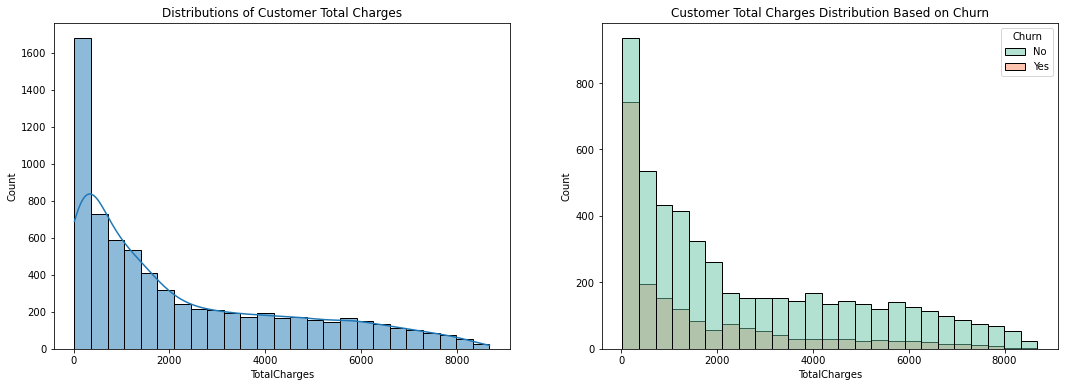

In [149]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(x='TotalCharges',data=df,kde=True,palette='Set2')
plt.title("Distributions of Customer Total Charges")

plt.subplot(1,2,2)
sns.histplot(x='TotalCharges',data=df,hue='Churn',palette='Set2')
plt.title('Customer Total Charges Distribution Based on Churn')

- Total Charges setiap consumer terdiri dari range 0 hingga 8000an.
- Semakin rendah total Chargesnya maka semakin tinggi mengindikasikan customer itu akan churn.

### Monthly Charges and Total Charges

Text(0.5, 1.0, 'Distribution of Monthly and Total Charges on Churn of Customer')

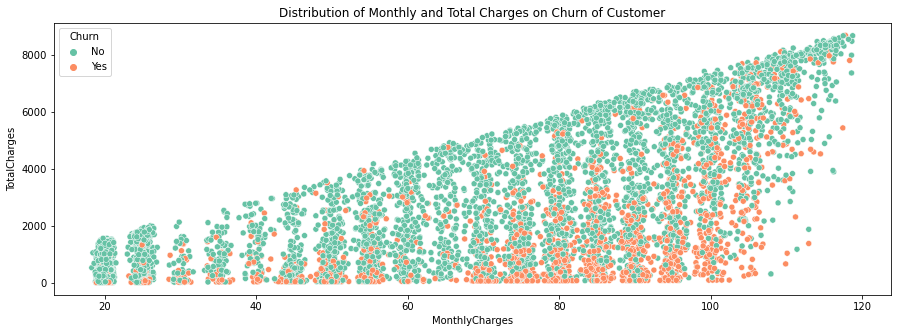

In [150]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= 'MonthlyCharges',y='TotalCharges',data=df,hue='Churn', palette='Set2')
plt.title('Distribution of Monthly and Total Charges on Churn of Customer')

- Berdasarkan hubungan Monthly Charges dan Total Charges, dapat dilihat bahwa semakin tinggi Monthly Chargesnya maka Total Chargesnya meningkat. Selain itu juga dapat dilihat consumer yang akan Churn diindikasikan pada monthly charges tinggi namun Total Charges yang rendah.

### Total Charges and Tenure

Text(0.5, 1.0, 'Distribution of Monthly and Total Charges on Churn of Customer')

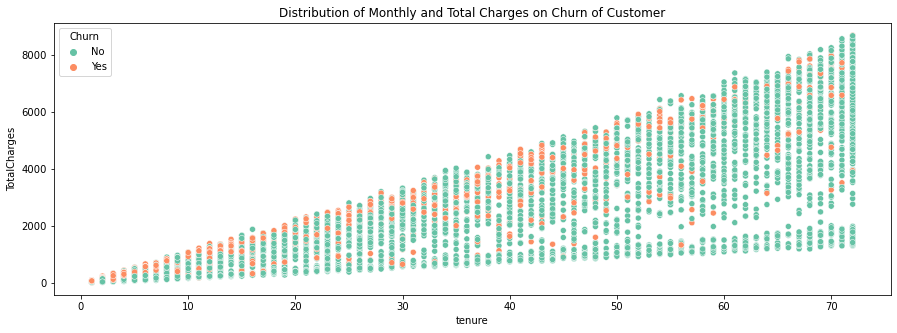

In [151]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= 'tenure',y='TotalCharges',data=df,hue='Churn', palette='Set2')
plt.title('Distribution of Monthly and Total Charges on Churn of Customer')

- Berdasarkan hubungan antara tenure dan total charges didapatkan informasi bahwa semakin lama tenurenya maka total chargesnya akan semakin meningkat. Selain itu mayoritas customer yang akan Churn berada pada Total Charges rendah dengan Tenur ynag rendah juga.

## Correlation Plot

Selanjutnya akan melihat correlation dengan menggunakan heatmap. Dimana pada correlation ini ingin melihat hubungan feature-feature dan feature-target. Dimana pada correlation ini hanya dapat dilakukan untuk data bertipe numerical.

In [152]:
# membuat dataframe untuk correlation
df_corr = df.copy()

# drop feature categorical

df_corr=df_corr.drop(columns=col_cat,axis=1)

In [153]:
# Melihat dataframe untuk correlation

df_corr.head()


,customerID,tenure,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,29.85,29.85,No
1,5575-GNVDE,34,56.95,1889.50,No
2,3668-QPYBK,2,53.85,108.15,Yes
3,7795-CFOCW,45,42.30,1840.75,No
4,9237-HQITU,2,70.70,151.65,Yes


Data Customer ID dan data target Churn tidak diperlukan maka akan di drop.

In [154]:
# drop customerID

df_corr=df_corr.drop(columns=['customerID','Churn'],axis=1)

In [155]:
#melihat dataframe correaltion
df_corr.head(4)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75


Terlihat dataframe sudah berisikan feature numerical.

### Label Encoder

Pada data target (Churn) masih berbentuk data Yes dan No belum berbentuk label [0 1], sehingga disini akan melakukan encoding terlebih dahulu dengan menggunakna label encoder.

In [156]:
# data target -> y_corr
y_corr = df['Churn']

In [157]:
# fit label encoder
target_encoder = preprocessing.LabelEncoder() #model label encoder
target_encoder.fit(['No','Yes']) # dimana nilai 0 adalah No dan nilai 1 adalah Yes

LabelEncoder()

In [158]:
# Transform target Churn
y_churn_label = target_encoder.transform(y_corr)

In [159]:
# memasukan hasil transform target ke dataframe correlation
df_corr['Churn'] = y_churn_label

In [160]:
# melihat 5 data pertama df_corr
df_corr.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,1
3,45,42.30,1840.75,0
4,2,70.70,151.65,1


Pada data ini Churn sudah berbentuk label dimana 0 menandakan bahwa customer tidak churn dan 1 menandakan bahwa customer akan churn.

### Correlation Heatmap Plot

<AxesSubplot:>

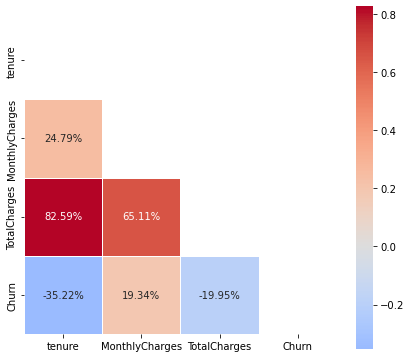

In [161]:
# Melakukan plotting correlation dengan heatmap
corr = df_corr.corr() #menghitung correlation
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(7, 7))
cmap = sns.color_palette("coolwarm", as_cmap=True) #color palette untuk colormap heatmap nya
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, fmt ='.2%', linewidths=.5, cbar_kws={"shrink": .9}) #plot heatmap

#### Feature-Target Correlation

Berdasarkan hubungan antara feature terhadap target :

- Seluruh feature numerical (tenure, monthly charges, dan total charges) memiliki hubungan atau correlation yang tinggi terhadap churn.
- Feature Monthly Charges memiliki hubungan tinggi dengan Churn berbanding lurus.
- Feature tenure dan total charges memiliki hubungan tinggi dengan Churn berbanding terbalik.
- Feature tenure memilii persentase correaltion tertinggi terhadap Churn.

#### Feature-Feature Correlation

Selanjutnya melihat hubungan antara feature terhadap target :

- Total Charges memiliki hubungan yang tinggi dengan feature tenure dan monthly charges.
- Monthly Charges juga memiliki hubungan tidak terlalu tinggi dengan tenure hanya 24%.

Berdasarkan hubungan antar feature, terdapat beberapa feature yang memiliki hubungan yang cukup tinggi antar satu sama lainnya. Dimana jika hubungan antar feature sangat tinggi dapat menciptakan redundant features pada model nantinya.

Insight-insight dari melihat ini akan menjadi pertimbangan dalam data preprocessing saat feature selection.

# Data Preprocessing

## Handling Missing Values

Cek data missing, dimana sebelumnya didapatkan informasi bahwa terdapat missing value pada column total charges.

In [162]:
# cek data missing
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Terlihat terdapat 11 missing values pada data Total Charges.

In [163]:
# melihat data missing pada total charges
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Terlihat pada data Total Charges yang missing ini mayoritas customernya menggunakan payment method Mailed Check dengan Contract mayoritas selama dua tahun. 
- Selain itu juga mayoritas customer tidak menggunakan Internet Service. 
- Customer memiliki Monthly charges yang bervariasi.
- Seluruh customer yang datanya missing pada Total Charges tidak (No) Churn.

Sehingga kemungkinan data missing ini dikarenakan tidak terinputnya atau hilangnya data Total Charges pada customer ini selain itu juga jumlahnya sedikit yaitu hanya sebanyak 11 data. Maka data missing akan didrop.

In [164]:
#drop missing value

df_clean = df.dropna(axis=0) #axis 0 adalah baris

#

In [165]:
# Cek missing value settelah handling

df_clean.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Terlihat pada dataframe sudah tidak ada feature yang berisikan missing values.

## Drop Column tidak diperlukan :

Selanjutnya sebelumnya telah diketahui bahwa terdapat column yang tidak diperlukan dalam modelling karena tidak akan ada pengaruhnya, yaitu customerID karena pada feature ini berisikan unique ID customer. Sehingga selanjutnya Saya akan drop column tersebut.

In [166]:
#drop feature tidak diperlukan dan membuat dataframe final
df_final = df_clean.drop(columns='customerID',axis=1)

In [167]:
# reset index
df_final.reset_index(drop =True, inplace=True)
# melihat shape
df_final.shape

(7032, 20)

## Splitting Data Train-Validation-Test

Membuat data features (X) dan data target (y) :

In [168]:
# Splitting data menjadi X(features), y(target) 
X,y = df_final.drop('Churn',axis=1), df_final['Churn']

Split data menjadi Train full dan data test :

Membagi data dengan jumlah dataset Train full sebanyak 80% dan dataset Test sebanyak 20%.

In [169]:
# Split data X (features) dan y(target) menjadi data train full-test set

X_train_full, X_test, y_train_full, y_test = model_selection.train_test_split(X,y,test_size= 0.2, random_state = 98)

print('X Train Full Size : ', X_train_full.shape)
print('X Test Size  : ', X_test.shape)

print('y Train Full Size : ', y_train_full.shape)
print('y Test Size  : ', y_test.shape)

X Train Full Size :  (5625, 19)
X Test Size  :  (1407, 19)
y Train Full Size :  (5625,)
y Test Size  :  (1407,)


Split dataset Train full menjadi data train dan data validation :

Membagi dataset Train full dengan jumlah dataset Train sebanyak 80% dan dataset Validation sebanyak 20%.

In [170]:
# Split data train full menjadi data train dan validation set

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_full,y_train_full,test_size= 0.2, random_state = 98)

print('X Train  Size : ', X_train.shape)
print('X Validation Size  : ', X_val.shape)

print('y Train  Size : ', y_train.shape)
print('y Validation Size  : ', y_val.shape)

X Train  Size :  (4500, 19)
X Validation Size  :  (1125, 19)
y Train  Size :  (4500,)
y Validation Size  :  (1125,)


- Data train sebanyak 4500 data
- Data validation sebanyak 1125 data
- Data test sebanyak 1407 data

In [171]:
# Setelah itu dilakukan reset_index karena sebelumnya saat pembagian train-test secara acak

# features
X_train.reset_index(drop=True,inplace=True)
X_val.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

# target
y_train.reset_index(drop=True,inplace=True)
y_val.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

## Handling Outliers

Melakukan handling outliers pada data train pada data numerical.

In [172]:
# fungsi untuk filtering data outlier
def upper_lower(df,col):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    upper_bound =  df[col].quantile(0.75) + 1.5*IQR
    lower_bound =  df[col].quantile(0.25) - 1.5*IQR
    return df[(df[col]> lower_bound)&(df[col]> upper_bound)]

In [173]:
#Membuat tabel berisikan nama column dan persentase outliernya
outliers_percentage = pd.DataFrame(columns = ['Columns', 'Outlier Percentage'])

for i in range(len(col_num)):
    outliers_percentage.loc[i] = [col_num[i], round(upper_lower(X_train,col_num[i]).shape[0]/ X_train.shape[0]*100,2)]

In [174]:
outliers_percentage

,Columns,Outlier Percentage
0,tenure,0.0
1,MonthlyCharges,0.0
2,TotalCharges,0.0


Terlihat bahwa pada data tidak terlihat adanya outliers.

Melakukan pengecekan dengan boxplot:

Pengecekan Outliers pada column :  tenure


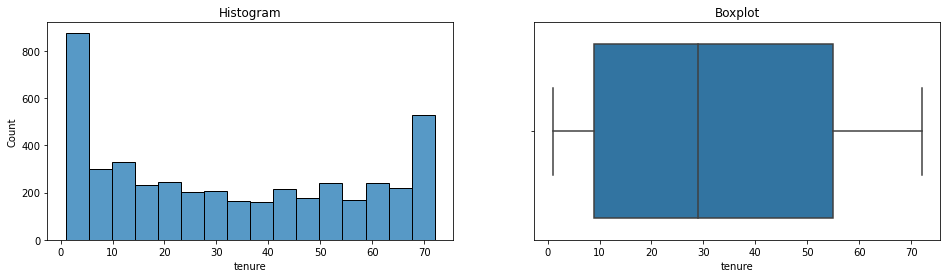

Pengecekan Outliers pada column :  MonthlyCharges


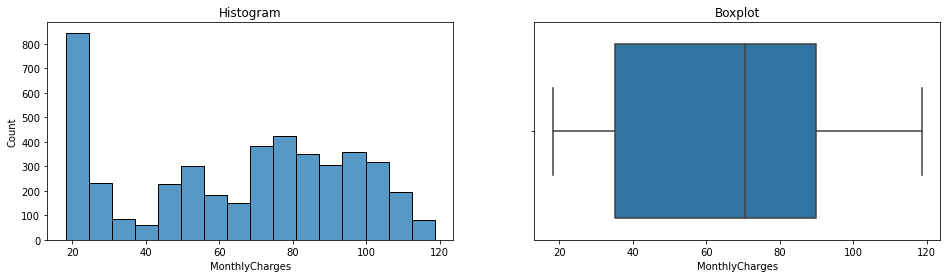

Pengecekan Outliers pada column :  TotalCharges


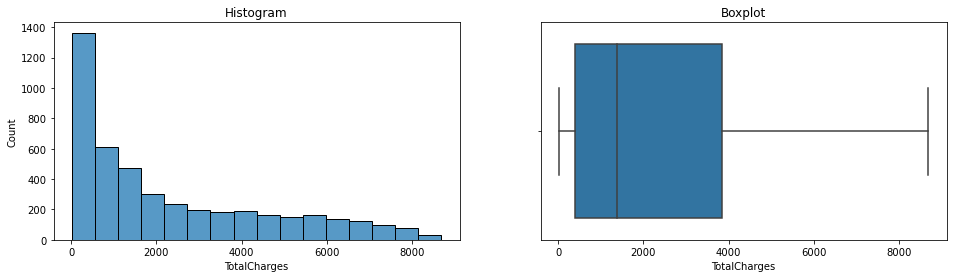

In [175]:
for col in col_num:
    print('Pengecekan Outliers pada column : ',col)
    plt.figure(figsize=(16,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x = col,data=X_train,bins=16)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x = col,data=X_train)
    plt.title('Boxplot')
    plt.show()

Terlihat bahwa pada boxplot terlihat bahwa tidak adanya outliers.

Sehingga tidak adanya handling outliers pada kasus ini.

## Label Encoders Target

Karena pada data target masih dalam bentuk string maka akan dilakukan encoding terlebih dahulu agar data target sudah menjadi label, dimana :

- Label 0 adalah No Churn
- Label 1 adalah Yes Churn

In [176]:
# Label Encoder yang sudah di fit 
target_encoder

LabelEncoder()

In [177]:
# Transform target Train
y_train_final = target_encoder.transform(y_train)

# Transform target Validation
y_val_final = target_encoder.transform(y_val)

# Transform target Test
y_test_final = target_encoder.transform(y_test)

## Scaling and Encoding Features

Pada data numerical akan dlikakuan scaling dengan menggunakan metode MinMax. Metode ini digunakan karena terdapat data yang tidak terdistribusi normal.

Selain itu untuk data categorical akan dilakukan encoding dengan OneHotEncoder untuk feature categorical dengan tipe nominal dan dilakukan encoding dengan OrdinalEncoder untuk feature categorical yang bertipe ordinal.

### Scaling :

Pada scaling ini akan menggunakan pipeline agar lebih mudah dan nanti akan digabungkan step nya dengan saat training model, scaling diperuntukan untuk data numerical :

In [178]:
# Scaling_features

features_scaler = Pipeline([("minmax",preprocessing.MinMaxScaler())]) #defaulte minmax scaler di scaling pada range 0 hingga 1

### Encoding

Nominal :

Pada feature categorical nominal akan dilakukan encoding dengan menggunakan onehot encoder.

Pada dataset ini, feature categorical yang bertipe nominal sebanyak 15 features

In [179]:
# onehotencoder

features_ohe = Pipeline([("ohe",preprocessing.OneHotEncoder(handle_unknown = 'ignore'))]) #default

Ordinal :

Pada feature categorical ordinal akan dilakukan encoding dengan menggunakan ordinal encoder.

Pada dataset ini, feature categorical yang bertipe ordinal adalah Contract, dimana terdapat data level selama 1 bulan, 1 tahun, dan 2 tahun.

In [180]:
level= [['Month-to-month','One year','Two year']] #level categorical

In [181]:
# ordinal encoder

features_ordinal = Pipeline([("ord",preprocessing.OrdinalEncoder(categories=level))])

In [182]:
# Column numerical
col_num

['tenure', 'MonthlyCharges', 'TotalCharges']

In [183]:
# Variabel berisikan nama column dengan tipe data nominal
col_nominal = ['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [184]:
# Variabel berisikan nama column dengan tipe data ordinal
col_ordinal = ['Contract']

### Membuat dataframe untuk feature selection:

In [185]:
# List nama column numerical
col_numerical = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']

In [186]:
#list nama column setelah OHE
col_name_ohe = ['Female', 'Male',
'No - Partner', 
'Yes - Partner',
'No - Dependents', 
'Yes - Dependents',
'No - PhoneService', 
'Yes - PhoneService',
'No - Multiple Lines',
'No phone service - Multiple Lines',
'Yes - Multiple Lines',
'DSL - InternetService',
'Fiber optic - InternetService',
'No - InternetService',
'No - OnlineSecurity', 
'No internet service - OnlineSecurity', 
'Yes - OnlineSecurity',
'No - OnlineBackup', 
'No internet service - OnlineBackup', 
'Yes - OnlineBackup',
'No - DeviceProtection',
'No internet service - DeviceProtection',
'Yes - DeviceProtection',
'No - TechSupport',
'No internet service - TechSupport',
'Yes - TechSupport',
'No - StreamingTV',
'No internet service - StreamingTV',
'Yes - StreamingTV',
'No - StreamingMovies',
'No internet service - StreamingMovies',
'Yes - StreamingMovies',
'No - PaperlessBilling', 
'Yes - PaperlessBilling',
'Bank transfer (automatic)',
'Credit card (automatic)',
'Electronic check',
'Mailed check']

Membuat Column Transformer untuk data yang akan digunakan untuk menghitung feature importance dan untuk proses feature selection:

In [187]:
#transformer fi adalah proses scaling encoding data untuk kebutuhan feature importance
transformer_fi = ColumnTransformer(
    transformers=[
        ("numerical", features_scaler, col_numerical),
        ("ordinal", features_ordinal, col_ordinal),
        ("nominal", features_ohe, col_nominal)
    ]
)

In [188]:
# split data X feature dan target y untuk feature importance
X_fi,y_fi = df_final.drop(columns='Churn',axis=1),df_final['Churn']

In [189]:
# scaling encoding data
X_fi_tranform = transformer_fi.fit_transform(X_fi) #transform scaling encoding data X untuk feature importance
y_fi_tranform = target_encoder.transform(y_fi) #transform label encoding data y untuk feature importance

In [190]:
# col name final

col_final =['SeniorCitizen',
'tenure',
'MonthlyCharges',
'TotalCharges',
'Contract',
'Female', 
'Male',
'No - Partner', 
'Yes - Partner',
'No - Dependents', 
'Yes - Dependents',
'No - PhoneService', 
'Yes - PhoneService',
'No - Multiple Lines',
'No phone service - Multiple Lines',
'Yes - Multiple Lines',
'DSL - InternetService',
'Fiber optic - InternetService',
'No - InternetService',
'No - OnlineSecurity', 
'No internet service - OnlineSecurity', 
'Yes - OnlineSecurity',
'No - OnlineBackup', 
'No internet service - OnlineBackup', 
'Yes - OnlineBackup',
'No - DeviceProtection',
'No internet service - DeviceProtection',
'Yes - DeviceProtection',
'No - TechSupport',
'No internet service - TechSupport',
'Yes - TechSupport',
'No - StreamingTV',
'No internet service - StreamingTV',
'Yes - StreamingTV',
'No - StreamingMovies',
'No internet service - StreamingMovies',
'Yes - StreamingMovies',
'No - PaperlessBilling', 
'Yes - PaperlessBilling',
'Bank transfer (automatic)',
'Credit card (automatic)',
'Electronic check',
'Mailed check']

In [191]:
# membuat hasil transformer menjadi dataframe
df_fi = pd.DataFrame(X_fi_tranform, columns= col_final)

In [192]:
#melihat 5 data perama
df_fi.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Contract,Female,Male,No - Partner,Yes - Partner,No - Dependents,...,Yes - StreamingTV,No - StreamingMovies,No internet service - StreamingMovies,Yes - StreamingMovies,No - PaperlessBilling,Yes - PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Feature Selection :

### Feature Importance dengan ExtraTreesClassifier

Feature yang nanti dipilih adalah feature yang merupakan top 10 memiliki pengaruh atau hubungan tinggi terhadap data target.

Namun hal ini akan di dibandingkan dengan hasil analisa correlation plot baik hubungan feature antar featur dan feature antar target agar tidak adanya variabel redundant untuk modelling.

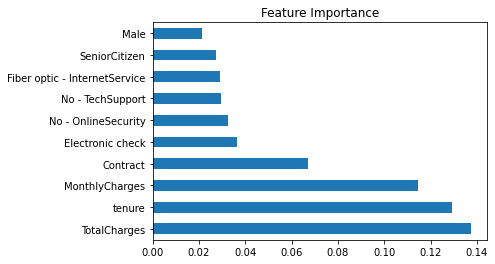

In [193]:
# Menghitung featture importance dengan menggunakan Extra trees classifier

model_fi = ExtraTreesClassifier(random_state=98) #model feature importance
model_fi.fit(df_fi,y_fi_tranform) # pada data X terhadap y dilakukan training (fit)
feat_importances = pd.Series(model_fi.feature_importances_, index = df_fi.columns) # memasukan feature importance dengan index nama column pada data X (features)
feat_importances.nlargest(10).plot(kind='barh') # plot bar
plt.title('Feature Importance')
plt.show()

Berdasarkan Feature Importance, top 10 tertinggi adalah :

- Total Charges
- tenure
- Monthly Charges
- Contract
- Electronic Check (Payment Method)
- No - Online Security
- No - TechSupport
- Fiber Optic - Internet Service
- SeniorCitizen
- Male - Gender

### Chi Score :

Memilih feature berdasarkan nilai k tertinggi  dengan score function chisqaure.

In [194]:
# Berdasarkan chi score dengan memilih 10 feature terbaik
selector = SelectKBest(chi2, k=10) # k=10, 10 terbaik
selector.fit(df_fi, y_fi_tranform) #fit untuk chi
df_fi_new = selector.transform(df_fi) 
print(" Top 10 tertinggi versi chi score : ",df_fi.columns[selector.get_support(indices=True)])

 Top 10 tertinggi versi chi score :  Index(['Contract', 'Fiber optic - InternetService', 'No - OnlineSecurity',
       'No internet service - OnlineBackup',
       'No internet service - DeviceProtection', 'No - TechSupport',
       'No internet service - TechSupport',
       'No internet service - StreamingTV',
       'No internet service - StreamingMovies', 'Electronic check'],
      dtype='object')


Berdasarkan Chi Score nya, top 10 tertinggi adalah :

- Contract
- Fiber Optic - Internet Service
- No - OnlineSecurity
- No - OnlineBackup
- No internet service - DeviceProtection
- No - TechSupport
- No internet service - TechSupport
- No internet service - StreamingTV
- No internet service - StreamingMovies
- Electronic check - Payment Method

### Selection :

Sehingga berdasarkan Correlation Plot di dapat hubungan Feature-Target tertinggi adalah :
- Tenure
- Monthly Charges
- Total Charges

Berdasarkan Feature Importance, top 10 tertinggi adalah :

- Total Charges
- tenure
- Monthly Charges
- Contract
- Payment Method
- Online Security
- TechSupport
- Internet Service
- SeniorCitizen
- Gender

Berdasarkan Chi Score, top 10 tertinggi adalah :

- Contract
- Internet Service
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Payment Method

Namun Selanjutnya perlu dipikirkan insight yang didapat saat melihat correlation antar feature nya, dimana didapatkan :

- Total Charges memiliki hubungan yang tinggi dengan feature tenure dan monthly charges.
- Monthly Charges juga memiliki hubungan tidak terlalu tinggi dengan tenure hanya 24%.

Sehingga feature yang memiliki hubungan yang tingi antar satu sama lain ini hanya dipilih salah satu saja.

Sehingga dari antar feature yang memiliki hubungan yang kuat adalah diambil keputusan sebagai berikut :
- Karena Total Charges memiliki hubungan tinggi dengan keduanya, baik terhadap monthly charges dan tenure, maka disini Saya memilih 1 feature yang dapat mewakilkan 2 features itu, yaitu feature Total Charges.

Sehingga dipilih Top 5 Feature di bawah ini yang akan digunakan dalam modelling:
- Total Charges
- Contract
- Payment Method
- Internet Service
- Online Security

Sehingga kelima feature inilah yang akan digunakan dalam training model.

In [195]:
# variabel selected numerical column
selected_num = ['TotalCharges']

# variabel selected ordinal column
selected_ord = ['Contract']

# variabel selected nominal column
selected_nom = ['PaymentMethod','InternetService','OnlineSecurity']

## Data Preprocessing Pipe

Membuat column transformer yang dimana digunkan untuk preprocessing data training modeling :

In [196]:
# Membuat column transformer untuk melakukan data preprocessing berupa scaling dan encoding sesuai tipe datanya. Column yang dimasukan adalah column yang dipilih sesuai hasil feature selection
preprocess_data = ColumnTransformer(
    transformers=[
        ("num", features_scaler, selected_num), #data numerical
        ("ord", features_ordinal, selected_ord), #data ordinal
        ("nom", features_ohe, selected_nom) #data nominal
    ]
)

In [197]:
#fit model data preprocessing ke data training
preprocess_data.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('minmax', MinMaxScaler())]),
                                 ['TotalCharges']),
                                ('ord',
                                 Pipeline(steps=[('ord',
                                                  OrdinalEncoder(categories=[['Month-to-month',
                                                                              'One '
                                                                              'year',
                                                                              'Two '
                                                                              'year']]))]),
                                 ['Contract']),
                                ('nom',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['PaymentMethod', 'InternetService',
                                  'OnlineSecurity'])])

In [198]:
# transform data train
X_train_final = preprocess_data.transform(X_train)

# transform data validation
X_val_final = preprocess_data.transform(X_val)

# transform data test
X_test_final = preprocess_data.transform(X_test)

# Model Definition

Pada kasus ini akan melakukan prediksi biner [Yes ,No] Churn customer dari suatu perusahaan Telekomunikasi. Prediksi akan dilakukan dengan melakukan training pada Model Artificial Neural Network.

Artificial Neural Network terdapat dua API, yaitu Sequential API dan Functional API. Kedua API ini akan dilakukan improvement selain itu juga dibandingkan.

Metric yang akan digunakan adalah F1 Score dan ROC-AUC Score karena pada kasus ini akan memprediksi atau mengklasifikasi customer apakah akan Churn atau tidak. Selain itu juga akan melihat Confusion Matrixnya untuk melihat persebaran data True Positive, False Positive, False Negative, True Negative.

Pada kasus ini accuracy tidak bisa menjadi metric satu-satunya yang menjadi acuan karena data yang dimiliki imbalance.



## Membuat Pipe :

In [199]:
AUTOTUNE = tf.data.AUTOTUNE

In [200]:
def get_batches(x, y, shuffle_buffer_size, batch_size, shuffle=False):
    
    # membuat pipline
    data_ds = tf.data.Dataset.from_tensor_slices((x, y))
    preprocessed_data=data_ds
    
    if shuffle: # jika ingin melakukan shuffle perlu memberikan buffer size

        shuffled_data = preprocessed_data.shuffle(shuffle_buffer_size)
        
        # prefetch` lets the dataset fetch batches in the background while the model is training.
        data_batches = shuffled_data.batch(batch_size).cache().prefetch(AUTOTUNE) #berapa banyak batch yg ingin di prefetch
        
    else: 
        
        data_batches = preprocessed_data.batch(batch_size).cache().prefetch(AUTOTUNE)
    
    
    return data_batches 

Memilih batch size 64 agar training lebih cepat dibandingkan 32.

Lalu melakukan piping:

In [201]:
# pipe data train, validation, test
train_batches = get_batches(X_train_final, y_train_final, X_train.shape[0], 64, shuffle=True)
validation_batches = get_batches(X_val_final, y_val_final, X_val.shape[0], 64, shuffle=False)
test_batches = get_batches(X_test_final, y_test_final, X_test.shape[0], 64, shuffle=False)

# First Model Training

## API Sequential

In [202]:
# definisi model

model_sequential = keras.models.Sequential()

In [203]:
model_sequential.add(keras.layers.Dense(8,input_shape=[12], kernel_initializer=keras.initializers.he_normal(seed=98),activation='relu'))
model_sequential.add(keras.layers.Dense(4, kernel_initializer=keras.initializers.he_normal(seed=98),activation='relu'))
model_sequential.add(keras.layers.Dense(1, activation='sigmoid'))

- Model disini memiliki input sebanyaj 12 featuresm, 
- Setelah itu terdapat hidden layer sebanyak 8 neuron. Dimana weightnya di initializers dengan he_normal.
- Activation yang digunakan adalah relu
- untuk hidden layer ke 2 terdapat 4 neuron.
- Yang terakhir adalah layer output dimana hanya ada 1 jawaban lalu activation funvtion yang digunakan untuk binary adalah sigmoid,

In [204]:
model_sequential.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 4)                 36        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


Pada model_sequential ini input terdiri dari 12 features lalu ke hidden layer dengan node 3, weight initializer he_normal, lalu activation dengan menggunakan relu

In [250]:
#early stopping pada saat proses learning ketika loss selama 10 dittunggu mengalami penurunan atau stagnan/
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=10,
                                                  restore_best_weights=True)

In [206]:
# compile model sequential 1
model_sequential.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

- Loss yang digunakan adalah Adam dengan metric accuracy

In [207]:
#Training Model sequential 1
result_1 = model_sequential.fit(train_batches, 
         epochs=100, 
         validation_data=validation_batches,
         callbacks=early_stopping)

Epoch 1/100
71/71 [==============================] - 1s 6ms/step - loss: 0.6542 - accuracy: 0.6018 - val_loss: 0.5952 - val_accuracy: 0.7298
Epoch 2/100
71/71 [==============================] - 0s 5ms/step - loss: 0.5366 - accuracy: 0.7331 - val_loss: 0.5103 - val_accuracy: 0.7298
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4844 - accuracy: 0.7331 - val_loss: 0.4840 - val_accuracy: 0.7298
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.7331 - val_loss: 0.4703 - val_accuracy: 0.7298
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4539 - accuracy: 0.7331 - val_loss: 0.4637 - val_accuracy: 0.7298
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4481 - accuracy: 0.7404 - val_loss: 0.4601 - val_accuracy: 0.7662
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4446 - accuracy: 0.7844 - val_loss: 0.4579 - val_accuracy: 0.7804
Epoch 8/100
7

## API Functional

In [208]:
# model dengan API functional

model_input = tf.keras.Input(shape=(12,))

hidden1 = keras.layers.Dense(6,activation ='relu',kernel_initializer=keras.initializers.he_normal(seed=98))(model_input)
hidden2 = keras.layers.Dense(3,activation ='relu',kernel_initializer=keras.initializers.he_normal(seed=98))(hidden1)
model_output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden2)

model_functional = tf.keras.models.Model(inputs=model_input, outputs=model_output)

- Model disini memiliki input sebanyaj 12 featuresm, 
- Setelah itu terdapat hidden layer sebanyak 6 neuron. Dimana weightnya di initializers dengan he_normal.
- Activation yang digunakan adalah relu
- untuk hidden layer ke 2 terdapat 3 neuron.
- Yang terakhir adalah layer output dimana hanya ada 1 jawaban lalu activation funvtion yang digunakan untuk binary adalah sigmoid,
- Pada API Functional ini lebih fleksibel dan antar layer dapat berhubungan antar satu sama lain jika ditentukan.

In [209]:
model_functional.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_19 (Dense)            (None, 6)                 78        
                                                                 
 dense_20 (Dense)            (None, 3)                 21        
                                                                 
 dense_21 (Dense)            (None, 1)                 4         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [210]:
# compile model functional 1
model_functional.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [211]:
# Training model functional 1
result_2 = model_functional.fit(train_batches, 
         epochs=100, 
         validation_data=validation_batches,
         callbacks=early_stopping)

Epoch 1/100
71/71 [==============================] - 1s 5ms/step - loss: 0.5708 - accuracy: 0.7331 - val_loss: 0.5419 - val_accuracy: 0.7298
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5132 - accuracy: 0.7331 - val_loss: 0.5015 - val_accuracy: 0.7298
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.7331 - val_loss: 0.4771 - val_accuracy: 0.7298
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4617 - accuracy: 0.7331 - val_loss: 0.4697 - val_accuracy: 0.7298
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4553 - accuracy: 0.7331 - val_loss: 0.4659 - val_accuracy: 0.7298
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4514 - accuracy: 0.7331 - val_loss: 0.4636 - val_accuracy: 0.7298
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4488 - accuracy: 0.7758 - val_loss: 0.4623 - val_accuracy: 0.7716
Epoch 8/100
7

# First Model Evaluation

Model Sequential API :

(0.0, 1.0)

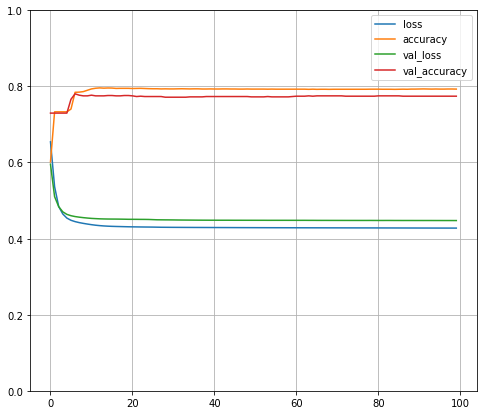

In [212]:

pd.DataFrame(result_1.history).plot(figsize=(8, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)


- Pada model Sequential API ini terlihat accuracy sempat constant walaupun loss errornya menurun. Lalu accuracynya meningkat.
- Pada model ini dapat dilihat cukup overfit karena terlihat adanya gap antara hasil train dan hasil validation.

Model Functional API :

(0.0, 1.0)

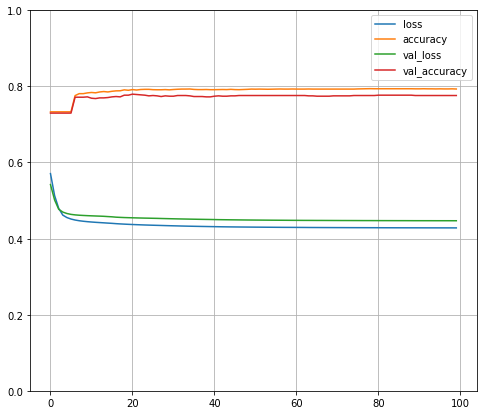

In [213]:
pd.DataFrame(result_2.history).plot(figsize=(8, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)

- Hal yang terjadi sama pada Functional dan Sequential dimana accuracy constan tetapi loss turun.
- Pada model ini dapat dilihat cukup overfit karena terlihat adanya gap antara hasil train dan hasil validation.
- Pada accuracy data train dan validation sempat berimpit pada saat epoch 20 namun jika dilihat dari loss nya sudah terdapat gap.

# Model Improvement :

# Second Model Training

- Pada Second Model ini akan diubah activation dari relu menjadi selu dan juga weight initializers diubah dari He menjadi Lecun.
- Jumlah hidden layer dan neuron sama.

## Sequential :

In [214]:
# definisi model sequential 2

model_sequential_2 = keras.models.Sequential()

model_sequential_2.add(keras.layers.Dense(8,input_shape=[12], kernel_initializer=keras.initializers.LecunNormal(seed=98),activation='selu'))
model_sequential_2.add(keras.layers.Dense(4, kernel_initializer=keras.initializers.LecunNormal(seed=98),activation='selu'))
model_sequential_2.add(keras.layers.Dense(1, activation='sigmoid'))

In [215]:
model_sequential_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 8)                 104       
                                                                 
 dense_23 (Dense)            (None, 4)                 36        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [216]:
# compile model sequential 2
model_sequential_2.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [217]:
# training model sequential 2
result_1_2 = model_sequential_2.fit(train_batches, 
         epochs=100, 
         validation_data=validation_batches,
         callbacks=early_stopping)

Epoch 1/100
71/71 [==============================] - 1s 7ms/step - loss: 0.5432 - accuracy: 0.6949 - val_loss: 0.4800 - val_accuracy: 0.7307
Epoch 2/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4493 - accuracy: 0.7822 - val_loss: 0.4548 - val_accuracy: 0.7742
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4369 - accuracy: 0.7860 - val_loss: 0.4518 - val_accuracy: 0.7636
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4340 - accuracy: 0.7882 - val_loss: 0.4512 - val_accuracy: 0.7627
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4330 - accuracy: 0.7887 - val_loss: 0.4508 - val_accuracy: 0.7662
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4325 - accuracy: 0.7900 - val_loss: 0.4506 - val_accuracy: 0.7653
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4322 - accuracy: 0.7904 - val_loss: 0.4504 - val_accuracy: 0.7653
Epoch 8/100
7

## Functional

In [218]:
# model dengan API functional 2

model_input_2 = tf.keras.Input(shape=(12,))

hidden1_2 = keras.layers.Dense(6,activation ='selu',kernel_initializer=keras.initializers.LecunNormal(seed=98))(model_input_2)
hidden2_2 = keras.layers.Dense(3,activation ='selu',kernel_initializer=keras.initializers.LecunNormal(seed=98))(hidden1_2)
model_output_2 = tf.keras.layers.Dense(1, activation='sigmoid')(hidden2_2)

model_functional_2 = tf.keras.models.Model(inputs=model_input_2, outputs=model_output_2)

In [219]:
model_functional_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_25 (Dense)            (None, 6)                 78        
                                                                 
 dense_26 (Dense)            (None, 3)                 21        
                                                                 
 dense_27 (Dense)            (None, 1)                 4         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [220]:
# compile model functional 2
model_functional_2.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [221]:
# Training model functional 2
result_2_2 = model_functional_2.fit(train_batches, 
         epochs=100, 
         validation_data=validation_batches,
         callbacks=[early_stopping])

Epoch 1/100
71/71 [==============================] - 1s 5ms/step - loss: 0.6071 - accuracy: 0.6891 - val_loss: 0.5307 - val_accuracy: 0.7298
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4868 - accuracy: 0.7676 - val_loss: 0.4730 - val_accuracy: 0.7689
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.7811 - val_loss: 0.4597 - val_accuracy: 0.7724
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4445 - accuracy: 0.7856 - val_loss: 0.4545 - val_accuracy: 0.7751
Epoch 5/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.7856 - val_loss: 0.4519 - val_accuracy: 0.7769
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4371 - accuracy: 0.7913 - val_loss: 0.4505 - val_accuracy: 0.7751
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.7951 - val_loss: 0.4496 - val_accuracy: 0.7716
Epoch 8/100
7

# Second Model Evaluation

(0.0, 1.0)

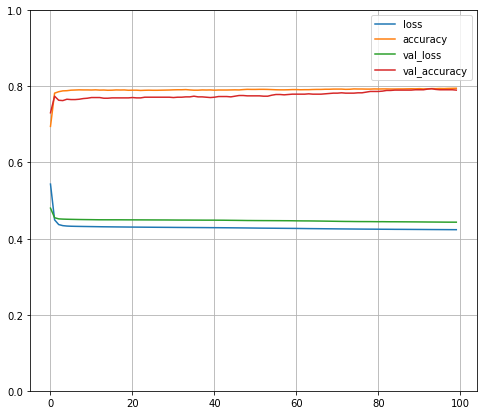

In [222]:
pd.DataFrame(result_1_2.history).plot(figsize=(8, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)

- Pada model sequential kedua ini terlihat bahwa model menjadi sedikit lebih baik, terlihat ketika loss menurun accuracy terus meningkat, bukan konstan.
- Accuracy mengalami peningkatan.
- Model terlihat goodfit accruacy pada epoch 80 hingga 100 namun jika dilihat loss nya masih terdapat gap..

(0.0, 1.0)

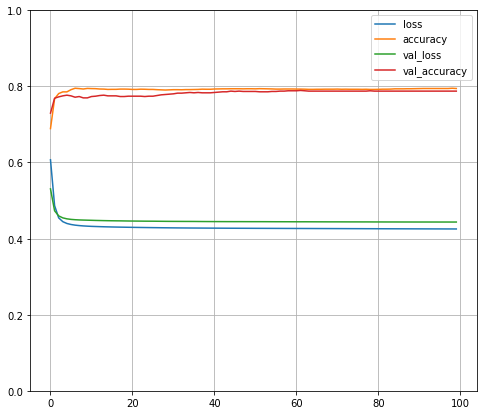

In [223]:

pd.DataFrame(result_2_2.history).plot(figsize=(8, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)


- Pada model functional kedua ini terlihat bahwa model menjadi sedikit goodfit karena pada epoch 60 hingga 80 accuracy berimpitan namun untuk loss tidak berimpitan.
- Accuracy mengalami penurunan.
- Model masih overfit.

# Third Model Training

- Pada Second Model ini akan diubah activation untuk model function API menggunakan activation dan initializers pertama sedangkan untuk sequential API menggunakan activation selu dan weight initializer He.
- Pada model improvement ini Saya mencoba menambah dropout sebesar 20%.
- Mengubah optimizers menjadi nadam dan juga mengurangi hidden layer dari 2 menjadi 1 saja karena kemungkinan hidden layer menambah data menjadi semakin overfiit.
- Melakukan perubahan jumlah neruon pada hidden layer. 

## Sequential :

In [224]:
# definisi model sequential 3

model_sequential_3 = keras.models.Sequential()

model_sequential_3.add(keras.layers.Dense(6,input_shape=[12], kernel_initializer=keras.initializers.LecunNormal(seed=98),activation='selu'))
model_sequential_3.add(keras.layers.Dropout(rate=0.2))
model_sequential_3.add(keras.layers.Dense(1, activation='sigmoid'))

In [225]:
# compile model sequential 3
model_sequential_3.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Nadam(),
             metrics=['accuracy'])

In [226]:
# training model sequential 3
result_3 = model_sequential_3.fit(train_batches, 
         epochs=100, 
         validation_data=validation_batches,
         callbacks=early_stopping)

Epoch 1/100
71/71 [==============================] - 1s 6ms/step - loss: 0.6937 - accuracy: 0.5620 - val_loss: 0.6091 - val_accuracy: 0.6756
Epoch 2/100
71/71 [==============================] - 0s 5ms/step - loss: 0.5629 - accuracy: 0.7211 - val_loss: 0.5299 - val_accuracy: 0.7484
Epoch 3/100
71/71 [==============================] - 0s 5ms/step - loss: 0.5106 - accuracy: 0.7371 - val_loss: 0.4957 - val_accuracy: 0.7627
Epoch 4/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4840 - accuracy: 0.7587 - val_loss: 0.4771 - val_accuracy: 0.7733
Epoch 5/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.7738 - val_loss: 0.4661 - val_accuracy: 0.7724
Epoch 6/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4572 - accuracy: 0.7760 - val_loss: 0.4603 - val_accuracy: 0.7716
Epoch 7/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4521 - accuracy: 0.7773 - val_loss: 0.4569 - val_accuracy: 0.7724
Epoch 8/100
7

## Functional :

In [227]:
# model dengan API functional 2

model_input_3 = tf.keras.Input(shape=(12,))

hidden1_3 = keras.layers.Dense(6,activation ='relu',kernel_initializer=keras.initializers.he_normal(seed=98))(model_input_3)
model_output_3 = tf.keras.layers.Dense(1, activation='sigmoid')(hidden1_3)

model_functional_3 = tf.keras.models.Model(inputs=model_input_3, outputs=model_output_3)

In [228]:
model_functional_3.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_30 (Dense)            (None, 6)                 78        
                                                                 
 dense_31 (Dense)            (None, 1)                 7         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [229]:
# compile model functional 3
model_functional_3.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Nadam(),
             metrics=['accuracy'])

In [230]:
# fit model functional 3
result_2_3 = model_functional_3.fit(train_batches, 
         epochs=100, 
         validation_data=validation_batches,
         callbacks=early_stopping)

Epoch 1/100
71/71 [==============================] - 1s 6ms/step - loss: 0.7571 - accuracy: 0.5124 - val_loss: 0.6411 - val_accuracy: 0.6347
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6055 - accuracy: 0.6718 - val_loss: 0.5509 - val_accuracy: 0.7200
Epoch 3/100
71/71 [==============================] - 0s 6ms/step - loss: 0.5328 - accuracy: 0.7287 - val_loss: 0.5065 - val_accuracy: 0.7298
Epoch 4/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4954 - accuracy: 0.7331 - val_loss: 0.4856 - val_accuracy: 0.7298
Epoch 5/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4785 - accuracy: 0.7331 - val_loss: 0.4773 - val_accuracy: 0.7298
Epoch 6/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4698 - accuracy: 0.7331 - val_loss: 0.4722 - val_accuracy: 0.7298
Epoch 7/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4638 - accuracy: 0.7331 - val_loss: 0.4685 - val_accuracy: 0.7298
Epoch 8/100
7

# Third Model Evaluation

(0.0, 1.0)

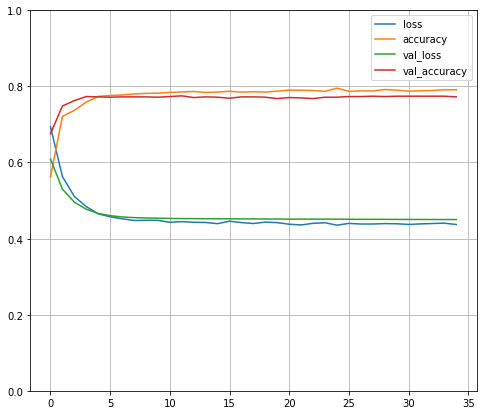

In [231]:
pd.DataFrame(result_3.history).plot(figsize=(8, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)

- Pada model sequential ketiga ini terlihat bahwa model menjadi sedikit lebih buruk dari sebelumnya, terlihat gap antar accuracy dan loss pada data train dan validation semakin lebih merenggang.
- Namun secara accuracy menurun.
- Model masih overfit.

(0.0, 1.0)

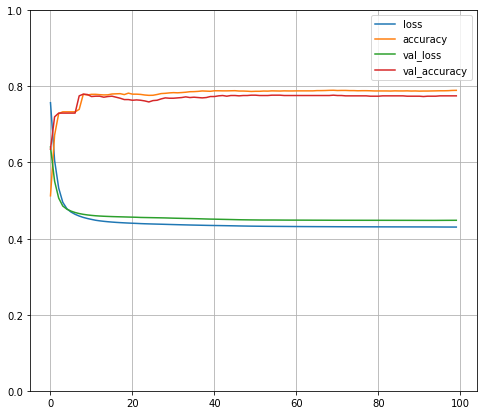

In [232]:
pd.DataFrame(result_2_3.history).plot(figsize=(8, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)

- Pada model functional ketiga ini terlihat bahwa model menjadi menurun performancenya karena dapat dilihat pada gap accuracy train dan validation memiliki gap yang menjadi lebih besar. hal ini dapa dilihat accuracy train meningkat namun accuracy data validation malah menurun.
- Accuracy mengalami penurunan.
- Model masih overfit terlihat gap yang masih besar.

# Model Selection :

Sehingga berdasarkan graph epoch terhadap accuracy dan loss pada data train dan data validation, Saya memilih model dengan API Sequential yang ke-2. Karena pada model ini lebih menuju ke Goodfit dibandingkan dengan model lainnya karena model yang lainnya memiliki gap antar data train dan data test yang lebih besar.

Architecture : 
- 1 input layer berisikan input 12
- 1 hidden layer berisikan 8 neuron dengan aktivasi selu dengan initializers Lecun normal
- Pada data output diberikan activation function karena data merupakan data biner. Dan hanya 1 node karena memprediksi 1 class.

(0.0, 1.0)

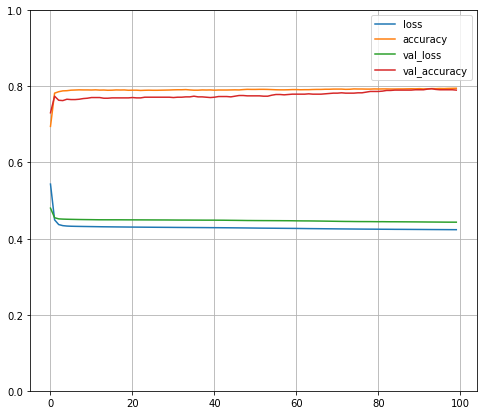

In [248]:
pd.DataFrame(result_1_2.history).plot(figsize=(8, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)

# Model Evaluation

Melakukan evaluation pada selected model :

In [241]:
# Melakukan prediksi pada data Train
y_pred_train = model_sequential_2.predict(X_train_final)
y_pred_train = y_pred_train.round() #round dimana ketika proba diatas 0.5 terprediksi 1 dan dibawahnya maka 0

# Melakukan prediksi pada data Validation
y_pred_val = model_sequential_2.predict(X_val_final)
y_pred_val = y_pred_val.round() #round dimana ketika proba diatas 0.5 terprediksi 1 dan dibawahnya maka 0

36/36 [==============================] - 0s 1ms/step


In [242]:
# membandingkan F1 score data train dan validation
print("F1 Score based model train: ",metrics.f1_score(y_train_final,y_pred_train))
print("F1 Score based model validation: ",metrics.f1_score(y_val_final,y_pred_val))

F1 Score based model train:  0.578168362627197
F1 Score based model validation:  0.5693430656934307


Jika dilihat dari F1 scorenya data train dan validation memiliki perbedaan sebesar 0.01 sehingga sebenarnya model ini cukup good fit.

In [243]:
print("F1 Score based model validation: ",metrics.f1_score(y_val_final,y_pred_val))
print("ROC-AUC Score based model validation: ",metrics.roc_auc_score(y_val_final,y_pred_val))
print("Accuracy Score based model validation: ",metrics.accuracy_score(y_val_final,y_pred_val))
print("Precision Score based model validation: ",metrics.precision_score(y_val_final,y_pred_val))
print("Recall Score based model validation: ",metrics.recall_score(y_val_final,y_pred_val))

F1 Score based model validation:  0.5693430656934307
ROC-AUC Score based model validation:  0.7029857683184819
Accuracy Score based model validation:  0.7902222222222223
Precision Score based model validation:  0.639344262295082
Recall Score based model validation:  0.5131578947368421


Berdasarkan hasil metrics nya :
- ROC-AUC score yang didapat adalah 0.7 sehingga disini dapat dikatakan bahwa model dapat membedakan True Positive dan True Negative sebesar 70%
- Berdasarkan nilai Precision dan Recall didapat bahwa dengan model ini didapat Precision yang lebih tinggi dibandingkan dengan Recallnya. Sehingga hal ini menandakan bahwa model ini lebih banyak mengidentifikasi data pada False Negative dibandingkan False Positive.
- Sehingga pada model ini untuk memprediksi Churn customer pada perusahaan telekomunikasi sebenarnya model ini belum tepat dikarenakan nilai recall yang sangat kecil sedangkan seharusnya nilai False Negative sangat minimal karena kesalahan prediksi False Negative dapat menyebabkan kesalaahan intrepetasi perusahaan terhadap konsumennya. Jika customer diprediksi tidak Churn namun seharusnya Churn maka ini akan menyebabkan hal yang fatal untuk perusahaan.


# Model Saving

Save model :

In [244]:
# freeze model
model_sequential_2.trainable = False

In [245]:
# save model
model_sequential_2.save('model_sq')
model_sequential_2.save("model.h5")

INFO:tensorflow:Assets written to: model_sq\assets


In [238]:
# save preprocessing
pickle.dump(preprocess_data, open("preprocess_churn.pkl", "wb"))

# Model Inference

Melakukan inference dengan menggunakan data test :

In [246]:
# Melakukan prediksi pada data Validation
y_pred_test = model_sequential_2.predict(X_test_final)
y_pred_test = y_pred_test.round()

44/44 [==============================] - 0s 2ms/step


In [247]:
print("F1 Score based model test: ",metrics.f1_score(y_test_final,y_pred_test))
print("ROC-AUC Score based model test: ",metrics.roc_auc_score(y_test_final,y_pred_test))
print("Accuracy Score based model test: ",metrics.accuracy_score(y_test_final,y_pred_test))
print("Precision Score based model test: ",metrics.precision_score(y_test_final,y_pred_test))
print("Recall Score based model test: ",metrics.recall_score(y_test_final,y_pred_test))

F1 Score based model test:  0.6051873198847261
ROC-AUC Score based model test:  0.73093517221034
Accuracy Score based model test:  0.8052594171997157
Precision Score based model test:  0.6363636363636364
Recall Score based model test:  0.5769230769230769


Terlihat pada data Test yang diujikan sebagai inference didapat score metric yang lebih tinggi jika dibandingkan dengan hasil prediksi pada data validation.

- Selain itu model berhasil memprediksi data

Selain itu model ini untuk inference dapat dilakukan pengecekan atau ujociba pada link berikut :
https://frontend-azmi.herokuapp.com/

# Conclusion

EDA :
- Data target terdapat pada column Churn dengan dua label yaitu Yes atau No. 
- Pada datta target ini cukup imbalance, dimana data didominasi oelh customer dengan Churn 'No' sebanyak 73.5% sedangkan yang 'Yes' hanya sebesar 26.5%. Sehingga Data target imbalance.
- Gender terdistribusi merata antar Female dan Male.
- Tidak ada pengaruh yang tinggi terhadap perbedaan gender terhadap Churn.
- Berdasarkan Senior Citizen dimana mayoritas Customer bukanlah seorang Senior Citizen. 
- Selain itu dapat dilihat bahwa rasio antar customer Churn dan tidak Churn lebih berdekatan untuk Customer yang merupakan senior Citizen.
- Berdasarkan partnernya, Customer yang memiliki dan tidak memiliki partner tersebar secara seimbang.
- Berdasarkan Churn, Customer yang tidak memiliki partner lebih mengindikasikan akan Churn.
- Mayoritas Customer tidak memiliki dependents atau tanggungan.
- Customer yang tidak memiliki dependents lebih mengindikasikan akan Churn.
- Tenure setiap customer terdistribusi dari 0 hingga 70. Dimana mayoritas berada di interval 0-5 dan 65-70.
- Customer dengan Tenure yang rendah lebih mengindikasikan akan Churn dibandingkan Tenure yang tinggi.
- Mayoritas customer menggunakan jasa phone service dari perusahaan telekomunikasi.
- Tidak ada hubungan yang kuat antara penggunaan jasa telepon dengan Churn.
- Mayoritas customer menggunakan jasa multiple line service dari perusahaan telekomunikasi.
- Tidak ada hubungan yang kuat antara penggunaan jasa multiple line dengan Churn.
- Mayoritas customer menggunakan jasa Internet Service tipe Fiber Optic dari perusahaan telekomunikasi.
- Consumer yang menggunakan jasa Fiber Optic untuk Internet Servicenya akan kemungkinan akan lebih mengindikasikan Churn.
- Mayoritas customer tidak menggunakan jasa Online Security dari perusahaan telekomunikasi.
- Consumer yang tidak menggunakan jasa Online Security akan kemungkinan akan lebih mengindikasikan Churn.
- Setiap bulannya Customer akan mendapat tagihan dalam rentan 20 hingga 120.
- Customer yang monthly Charges nya tinggi lebih rentan terhadap Churn.
- Total Charges setiap consumer terdiri dari range 0 hingga 8000an.
- Semakin rendah total Chargesnya maka semakin tinggi mengindikasikan customer itu akan churn.
- Berdasarkan hubungan Monthly Charges dan Total Charges, dapat dilihat bahwa semakin tinggi Monthly Chargesnya maka Total Chargesnya meningkat. Selain itu juga dapat dilihat consumer yang akan Churn diindikasikan pada monthly charges tinggi namun Total Charges yang rendah.
- Berdasarkan hubungan antara tenure dan total charges didapatkan informasi bahwa semakin lama tenurenya maka total chargesnya akan semakin meningkat. Selain itu mayoritas customer yang akan Churn berada pada Total Charges rendah dengan Tenur ynag rendah juga.




Pada tugas Milestone 1 ini berhasil mempersiapkan data untuk model Artificial Neural Network diaman dilakukan tahapan :
- Handling Missing Value
- Splitting Data
- Handling Outlier
- scaling dan encoding
- Feature Selection dan Feature Importance
- Membuat pipeline preprocessing data
- membuat pipline untuk deep learning dengan melakukan setting batch dan shuffle.

Dipilih Top 5 Feature di bawah ini yang akan digunakan dalam modelling:
- Total Charges
- Contract
- Payment Method
- Internet Service
- Online Security

Pada tugas ini berhasil membuat model deep learnign dengan Sequential API dan Functional API dimana pada setiap model-model tersebut dibuat architecturenya pada setiap layernya. Diamana diketahui bahwa Functional API memiliki structure Architecture yang lebih fleksibel.

Beberapa Architecture dilakukan eksperimen dengan memvariasikan jumlah layer, jumlah neuron, tipe activation, tipe weigh initializer, drop out feature dengan value 20% serta memvariasi optimizernya.

Sehingga berdasarkan graph epoch terhadap accuracy dan loss pada data train dan data validation, Saya memilih model dengan API Sequential yang ke-2. Karena pada model ini lebih menuju ke Goodfit dibandingkan dengan model lainnya karena model yang lainnya memiliki gap antar data train dan data test yang lebih besar.

Architecture : 
- 1 input layer berisikan input 12
- 1 hidden layer berisikan 8 neuron dengan aktivasi selu dengan initializers Lecun normal
- Pada data output diberikan activation function karena data merupakan data biner. Dan hanya 1 node karena memprediksi 1 class.

Berdasarkan hasil metrics nya :
- ROC-AUC score yang didapat adalah 0.7 sehingga disini dapat dikatakan bahwa model dapat membedakan True Positive dan True Negative sebesar 70%
- Berdasarkan nilai Precision dan Recall didapat bahwa dengan model ini didapat Precision yang lebih tinggi dibandingkan dengan Recallnya. Sehingga hal ini menandakan bahwa model ini lebih banyak mengidentifikasi data pada False Negative dibandingkan False Positive.
- Sehingga pada model ini untuk memprediksi Churn customer pada perusahaan telekomunikasi sebenarnya model ini belum tepat dikarenakan nilai recall yang sangat kecil sedangkan seharusnya nilai False Negative sangat minimal karena kesalahan prediksi False Negative dapat menyebabkan kesalaahan intrepetasi perusahaan terhadap konsumennya. Jika customer diprediksi tidak Churn namun seharusnya Churn maka ini akan menyebabkan hal yang fatal untuk perusahaan.


Selain itu model berhasil dilakukan inference dan dideploy pada link :

- frontend = https://frontend-azmi.herokuapp.com/
- backend = http://tfserving-azmi.herokuapp.com/v1/models/churn_model:predict


Future Improvement :

- Karena Data Target Imbalance maka perlu dilakukan pencarian data lebih banyak lagi, selain itu untuk balancing data juga dapat dilakukan dengan menggunakan metode undersampling, smote, dan sebagainya. Selain itu juga dapat dilakukan dengan mengatur nilai treshold proba.
- Terlihat dengan data yang sedikit ini kurang cocok jika digunakan untuk neural network. Sehingga perlu adanya banyak data.
- Mencoba eksperimen feature selection.